In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import iglob

In [3]:
from src.pipeline import get_columns

In [5]:
data = pd.read_csv('data/all_years_sample.csv', low_memory=False)


In [18]:
data = data.drop('Unnamed: 0', axis=1)

In [19]:
data['loan_status'].unique()

array(['Current', 'Charged Off', 'Fully Paid', 'Issued',
       'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)'],
      dtype=object)

### Get data for all years

In [2]:
dfs = []

In [3]:
# Get all 
for f in iglob('data/raw/' + '*.csv'):
    temp_df = pd.read_csv(f, skiprows=[0], low_memory=False)
    dfs.append(temp_df)

In [7]:
# Get the columns that are consistent in all years

cols = list(dfs[0].columns)
for i in range(1,len(dfs)):
    column_difference = set(cols).difference(set(dfs[i].columns))
    for c in column_difference:
        cols.remove(c)
            

In [10]:
data = dfs[0][cols]
for i in range(1, len(dfs)):
    data = data.append(dfs[i][cols])

In [14]:
# Create a sample dataset to make initial models simpler

data.sample(100000).to_csv('data/all_years_sample.csv')

In [15]:
# Save all data into one csv

data.to_csv('data/all_years.csv')

In [13]:
data.shape

(2854472, 126)

In [10]:
missing_cols = set()
for i in range(len(dfs)):
    for c in set(dfs[i].columns):
        if c not in cols:
            missing_cols.add(c)

### Exploration

In [13]:
columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [14]:
import pickle

In [16]:
with open('data/columns_in_all.pickle', 'wb') as handle:
    pickle.dump(columns, handle)

In [18]:
with open('data/columns_in_all.pickle', 'rb') as handle:
    cols = pickle.load(handle)

In [49]:
data = data[cols]

In [50]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog'],
      dtype='object', length=126)

In [82]:
data.iloc[:,110:130].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133887 entries, 0 to 133886
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   tot_hi_cred_lim                      133887 non-null  int64  
 1   total_bal_ex_mort                    133887 non-null  int64  
 2   total_bc_limit                       133887 non-null  int64  
 3   total_il_high_credit_limit           133887 non-null  int64  
 4   revol_bal_joint                      0 non-null       float64
 5   sec_app_fico_range_low               0 non-null       float64
 6   sec_app_fico_range_high              0 non-null       float64
 7   sec_app_earliest_cr_line             0 non-null       float64
 8   sec_app_inq_last_6mths               0 non-null       float64
 9   sec_app_mort_acc                     0 non-null       float64
 10  sec_app_open_acc                     0 non-null       float64
 11  sec_app_revol

In [87]:
# Columns to use:
X_joint = ['application_type',
           'annual_inc_joint',
           'dti_joint',
           'verification_status_joint',
           'revol_bal_joint',
           'sec_app_fico_range_low',
           'sec_app_fico_range_low', 
           'sec_app_fico_range_high',
           'sec_app_earliest_cr_line',
           'sec_app_inq_last_6mths',
           'sec_app_mort_acc ',
           'sec_app_open_acc',
           'sec_app_revol_util',
           'sec_app_num_rev_accts',
           'sec_app_chargeoff_within_12_mths',
           'sec_app_collections_12_mths_ex_med',
           'sec_app_mths_since_last_major_derog']
             
X_columns = ['loan_amnt', 
             'term', 
             'int_rate', 
             'installment', 
             'emp_length',
             'home_ownership',
             'annual_inc',
             'dti',
             'delinq_2yrs',
             'earliest_cr_line',
             'inq_last_6mths',
             'mths_since_last_delinq',
             'mths_since_last_record',
             'open_acc',
             'pub_rec',
             'revol_bal',
             'revol_util',
             'total_acc',
             'collections_12_mths_ex_med',
             'mths_since_last_major_derog',
             'acc_now_delinq',
             'tot_coll_amt',
             'il_util',
             'open_rv_12m',
             'open_rv_24m',
             'max_bal_bc',
             'all_util',
             'total_rev_hi_lim',
             'inq_fi', 
             'total_cu_tl',
             'inq_last_12m',
             'acc_open_past_24mths',
             'avg_cur_bal',
             'bc_open_to_buy',
             'bc_util',
             'chargeoff_within_12_mths',
             'delinq_amnt',
             'mo_sin_old_il_acct',
             'mo_sin_old_rev_tl_op',
             'mo_sin_rcnt_rev_tl_op',
             'mo_sin_rcnt_tl',
             'mort_acc',
             'mths_since_recent_bc',
             'mths_since_recent_bc_dlq',
             'mths_since_recent_inq',
             'mths_since_recent_revol_delinq',
             'num_accts_ever_120_pd',
             'num_actv_bc_tl',
             'num_actv_rev_tl',
             'num_bc_sats',
             'num_bc_tl',
             'num_il_tl',
             'num_op_rev_tl',
             'num_rev_accts',
             'num_rev_tl_bal_gt_0',
             'num_sats',
             'num_tl_120dpd_2m', #may be leakage
             'num_tl_30dpd', #may be leakage
             'num_tl_90g_dpd_24m',
             'num_tl_op_past_12m',
             'pct_tl_nvr_dlq',
             'percent_bc_gt_75',
             'pub_rec_bankruptcies',
             'tax_liens',
             'tot_hi_cred_lim',
             'total_bal_ex_mort',
             'total_bc_limit',
             'total_il_high_credit_limit']

target = ['issue_d']
# TODO: emp_title?
#       verification_status?
#       zip? addr_state?
#      fico?
#      last_credit_pull_d. <--- important to see if using old credit report
#.     application_type <--- may need to be split for ind vs joint


# Useless columns:
col_drop = ['member_id', 'funded_amnt', 'emp_title', 'url']


col_leak = ['funded_amnt_inv', 'int_rate', 'grade', 'sub_grade', 'issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv']

target = ['loan_status']

In [89]:
data[X_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133887 entries, 0 to 133886
Data columns (total 68 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       133887 non-null  int64  
 1   term                            133887 non-null  object 
 2   int_rate                        133887 non-null  object 
 3   installment                     133887 non-null  float64
 4   emp_length                      124943 non-null  object 
 5   home_ownership                  133887 non-null  object 
 6   annual_inc                      133887 non-null  float64
 7   dti                             133887 non-null  float64
 8   delinq_2yrs                     133887 non-null  int64  
 9   earliest_cr_line                133887 non-null  object 
 10  inq_last_6mths                  133886 non-null  float64
 11  mths_since_last_delinq          69322 non-null   float64
 12  mths_since_last_

In [61]:
data.loc[:10,'desc']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
Name: desc, dtype: object

<AxesSubplot:>

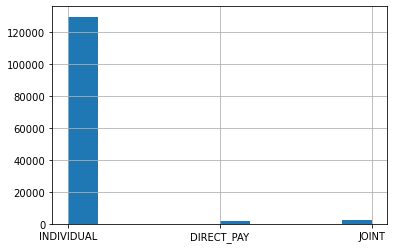

In [72]:
data['application_type'].hist()

In [62]:
data['desc'].isna().sum()

133877

In [63]:
len(data)

133887

In [53]:
data['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Charged Off',
       'Late (16-30 days)', 'In Grace Period', 'Default'], dtype=object)

<AxesSubplot:>

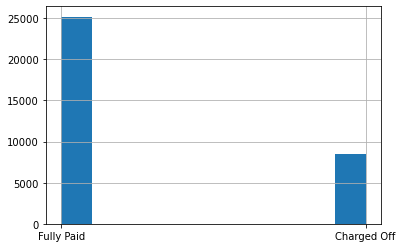

In [55]:
data['loan_status'][data['loan_status'].apply(lambda x: x in ['Fully Paid', 'Charged Off'])].hist()

In [56]:
data.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
id,1.000000,NaN,-0.039486,-0.039486,-0.039705,-0.032644,-0.024995,0.006478,-0.001504,0.014099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,-0.039486,NaN,1.000000,1.000000,0.999991,0.944055,0.303144,0.000296,-0.005336,0.114813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt,-0.039486,NaN,1.000000,1.000000,0.999991,0.944055,0.303144,0.000296,-0.005336,0.114813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,-0.039705,NaN,0.999991,0.999991,1.000000,0.943942,0.303205,0.000227,-0.005389,0.115038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sec_app_revol_util,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sec_app_num_rev_accts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sec_app_chargeoff_within_12_mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sec_app_collections_12_mths_ex_med,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
